# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Computational Bayesian Methods__

<br>

Author:  Tyler J. Brough <br>
Updated: December 8, 2021 <br>

---

<br>

In [1]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm

In [2]:
y = np.random.poisson(lam=3, size=200)

In [3]:
with pm.Model() as model:
    λ = pm.Gamma('λ', alpha=1, beta=1)
    y_pred = pm.Poisson('y_pred', mu=λ, observed=y)
    trace = pm.sample(2000)

<ipython-input-3-eb6451894985>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [λ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/tjb/anaconda3/envs/DATA5600/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'λ'}>,
        <AxesSubplot:title={'center':'λ'}>]], dtype=object)

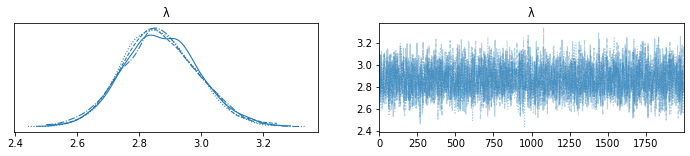

In [4]:
az.plot_trace(trace, var_names=['λ'])

In [5]:
pm.summary(trace, hdi_prob=0.95, kind='stats')

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/tjb/anaconda3/envs/DATA5600/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_2.5%,hdi_97.5%
λ,2.869,0.121,2.635,3.108


In [6]:
pm.summary?

Signature:
pm.summary(
    data,
    var_names: Union[List[str], NoneType] = None,
    filter_vars=None,
    group=None,
    fmt: "Literal['wide', 'long', 'xarray']" = 'wide',
    kind: "Literal['all', 'stats', 'diagnostics']" = 'all',
    round_to=None,
    circ_var_names=None,
    stat_funcs=None,
    extend=True,
    hdi_prob=None,
    skipna=False,
    labeller=None,
    coords=None,
    index_origin=None,
    order=None,
) -> Union[pandas.core.frame.DataFrame, xarray.core.dataset.Dataset]
Docstring:
Create a data frame with summary statistics.

Parameters
----------
data: obj
    Any object that can be converted to an az.InferenceData object
    Refer to documentation of az.convert_to_dataset for details
var_names: list
    Names of variables to include in summary. Prefix the variables by `~` when you
    want to exclude them from the summary: `["~beta"]` instead of `["beta"]` (see
    examples below).
filter_vars: {None, "like", "regex"}, optional, default=None
    If `None` (def